In [1]:
import pandas as pd

In [2]:
# Load all datasets
df_master = pd.read_csv("master_dataset.csv")

In [3]:
print(df_master.shape)
# Print data types BEFORE any cleaning
print("Data types BEFORE cleaning:\n")
print(df_master.dtypes)

# Also show a preview of the data for verification
print("\nPreview of df_master:\n")
df_master.head()


(1159966, 25)
Data types BEFORE cleaning:

Unnamed: 0                int64
transaction_id            int64
date                     object
client_id                 int64
card_id                   int64
amount                   object
use_chip                 object
merchant_id               int64
mcc                       int64
fraud                    object
card_brand               object
card_type                object
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
current_age               int64
gender                   object
per_capita_income        object
yearly_income            object
total_debt               object
credit_score              int64
num_credit_cards          int64
dtype: object

Preview of df_master:



,Unnamed: 0,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,mcc,fraud,...,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,22326462,2019-01-01 00:02:00,496,3186,$119.35,Chip Transaction,30286,4814,No,...,05/2016,2016,No,47,Male,$17810,$36319,$44737,730,4
1,1,22326465,2019-01-01 00:05:00,1129,2677,$100.00,Chip Transaction,27092,4829,No,...,04/2011,2011,No,49,Male,$16894,$34449,$36540,686,3
2,2,22326466,2019-01-01 00:06:00,114,5283,$51.71,Chip Transaction,61195,5541,No,...,10/2013,2013,No,47,Female,$16892,$34441,$907,725,4
3,3,22326467,2019-01-01 00:06:00,641,2774,$105.30,Swipe Transaction,75781,5411,No,...,04/2017,2017,No,62,Male,$18420,$37556,$0,735,6
4,4,22326468,2019-01-01 00:10:00,114,5283,$82.00,Chip Transaction,61195,5541,No,...,10/2013,2013,No,47,Female,$16892,$34441,$907,725,4


In [4]:
# Show missing values per column (sorted)
missing = df_master.isna().sum().sort_values(ascending=False)
print("Missing Values Per Column:\n")
print(missing)

Missing Values Per Column:

fraud                    382627
Unnamed: 0                    0
num_cards_issued              0
credit_score                  0
total_debt                    0
yearly_income                 0
per_capita_income             0
gender                        0
current_age                   0
card_on_dark_web              0
year_pin_last_changed         0
acct_open_date                0
credit_limit                  0
has_chip                      0
transaction_id                0
card_type                     0
card_brand                    0
mcc                           0
merchant_id                   0
use_chip                      0
amount                        0
card_id                       0
client_id                     0
date                          0
num_credit_cards              0
dtype: int64


In [5]:
df_master["fraud"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [6]:
#dropping nan rows
df_labeled = df_master.dropna(subset=["fraud"]).copy()

In [7]:
#checking for unique 
df_master.nunique()

Unnamed: 0               1159966
transaction_id           1159966
date                      353060
client_id                   1206
card_id                     3437
amount                     35338
use_chip                       3
merchant_id                27516
mcc                          109
fraud                          2
card_brand                     4
card_type                      3
has_chip                       2
num_cards_issued               3
credit_limit                2262
acct_open_date               294
year_pin_last_changed         19
card_on_dark_web               1
current_age                   74
gender                         2
per_capita_income           1109
yearly_income               1188
total_debt                  1137
credit_score                 280
num_credit_cards               9
dtype: int64

In [8]:
money_cols = [
    "amount",
    "credit_limit",
    "per_capita_income",
    "yearly_income",
    "total_debt"
]

for col in money_cols:
    # Only clean if column exists
    if col in df_labeled.columns:
        df_labeled[col] = (
            df_labeled[col]
            .astype(str)
            .str.replace(r"[\$,]", "", regex=True)
            .astype(float)
        )

print(df_labeled[money_cols].dtypes)





amount               float64
credit_limit         float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
dtype: object


In [9]:
df_labeled[money_cols].head()

,amount,credit_limit,per_capita_income,yearly_income,total_debt
0,119.35,22516.0,17810.0,36319.0,44737.0
1,100.00,7600.0,16894.0,34449.0,36540.0
2,51.71,10676.0,16892.0,34441.0,907.0
3,105.30,18401.0,18420.0,37556.0,0.0
4,82.00,10676.0,16892.0,34441.0,907.0


In [10]:
#convert date to datetime 
df_labeled["date"] = pd.to_datetime(df_master["date"])
df_labeled["date"].head()

0   2019-01-01 00:02:00
1   2019-01-01 00:05:00
2   2019-01-01 00:06:00
3   2019-01-01 00:06:00
4   2019-01-01 00:10:00
Name: date, dtype: datetime64[ns]

convert categorical columns to numeric (0/1)


My fraud column is still in text format (“Yes” /“No”).
I need Pandas code to convert it into numerical values (0 and 1) so I can use it as a target variable in machine learning models.
Please provide only the mapping code.

In [11]:
# Convert fraud: Yes/No → 1/0
df_labeled["fraud"] = df_labeled["fraud"].map({"No": 0, "Yes": 1})

In [12]:
# Convert has_chip: YES/NO → 1/0
df_labeled["has_chip"] = (
    df_labeled["has_chip"]
    .astype(str).str.strip().str.upper()
    .map({"YES": 1, "NO": 0})
)


In [13]:
# Convert card_on_dark_web: Yes/No → 1/0
df_labeled["card_on_dark_web"] = (
    df_labeled["card_on_dark_web"]
    .astype(str).str.strip().str.capitalize()
    .map({"Yes": 1, "No": 0})
)


In [14]:
df_labeled.dtypes

Unnamed: 0                        int64
transaction_id                    int64
date                     datetime64[ns]
client_id                         int64
card_id                           int64
amount                          float64
use_chip                         object
merchant_id                       int64
mcc                               int64
fraud                             int64
card_brand                       object
card_type                        object
has_chip                          int64
num_cards_issued                  int64
credit_limit                    float64
acct_open_date                   object
year_pin_last_changed             int64
card_on_dark_web                  int64
current_age                       int64
gender                           object
per_capita_income               float64
yearly_income                   float64
total_debt                      float64
credit_score                      int64
num_credit_cards                  int64


In [15]:
#checking for unique 
df_labeled.nunique()

Unnamed: 0               777339
transaction_id           777339
date                     315393
client_id                  1206
card_id                    3436
amount                    31398
use_chip                      3
merchant_id               24281
mcc                         109
fraud                         2
card_brand                    4
card_type                     3
has_chip                      2
num_cards_issued              3
credit_limit               2262
acct_open_date              293
year_pin_last_changed        19
card_on_dark_web              1
current_age                  74
gender                        2
per_capita_income          1109
yearly_income              1188
total_debt                 1137
credit_score                280
num_credit_cards              9
dtype: int64

OUTLIERS 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


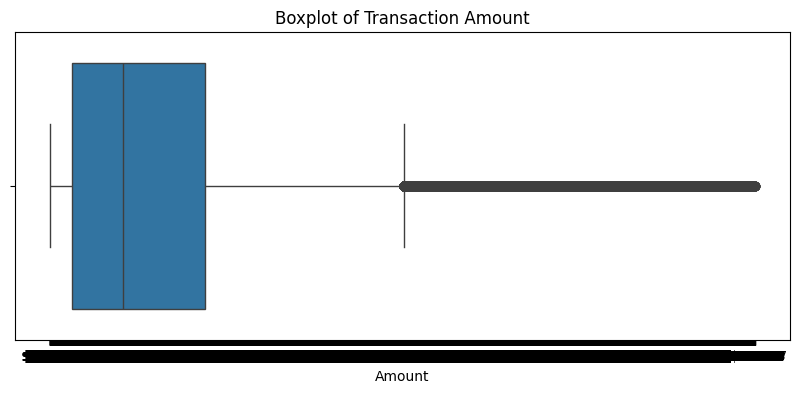

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_master["amount"])
plt.title("Boxplot of Transaction Amount")
plt.xlabel("Amount")
plt.show()
